In [1]:
import pandas as pd

In [3]:
import os
os.environ['USE_PYGEOS'] = '0'

In [4]:
import geopandas as gpd

https://www.icgc.cat/es/Descargas/Cartografia-vectorial/Divisiones-administrativas

In [11]:
provincias_url = '../data/divisions-administratives-v2r1-provincies-1000000-20230511.json'

In [13]:
provincias = gpd.read_file(provincias_url)

<AxesSubplot: >

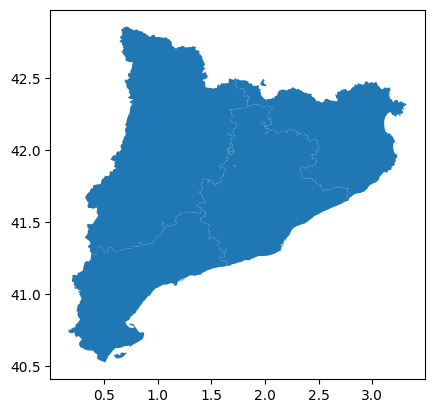

In [14]:
provincias.plot()

<AxesSubplot: >

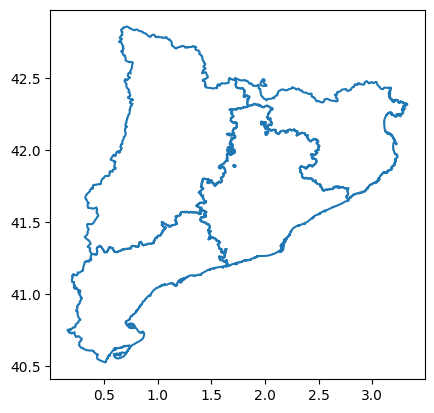

In [16]:
provincias.boundary.plot()

In [32]:
provincias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

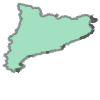

In [30]:
cat = provincias.make_valid().geometry.unary_union
cat

In [33]:
cat = gpd.GeoDataFrame(geometry=[cat], crs=provincias.crs)

<AxesSubplot: >

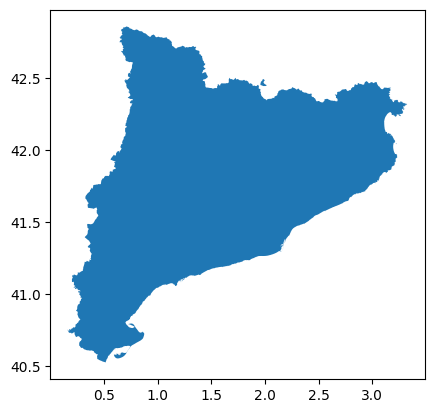

In [34]:
cat.plot()

In [37]:
municipios_file = '../data/divisions-administratives-v2r1-municipis-1000000-20230511.json'

In [39]:
municipios = gpd.read_file(municipios_file)
municipios

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,080018,Abrera,Abrera,19.978100,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((1.92486 41.53663, 1.92197 41.5..."
1,080023,Aguilar de Segarra,Aguilar de Segarra,43.219825,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"MULTIPOLYGON (((1.61829 41.76885, 1.61278 41.7..."
2,080039,Alella,Alella,9.619100,21,Maresme,Mataró,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.28512 41.51534, 2.28501 41.5..."
3,080044,Alpens,Alpens,13.778822,43,Lluçanès,Prats de Lluçanès,07,Catalunya Central,*,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.09411 42.14192, 2.09031 42.1..."
4,080057,l'Ametlla del Vallès,l'Ametlla del Vallès,14.088500,41,Vallès Oriental,Granollers,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((2.24126 41.70273, 2.24178 41.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,439039,Camarles,Camarles,25.194700,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"MULTIPOLYGON (((0.64370 40.82120, 0.64239 40.8..."
943,439044,l'Aldea,l'Aldea,35.273000,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"MULTIPOLYGON (((0.60964 40.80699, 0.60855 40.8..."
944,439057,Salou,Salou,15.124756,36,Tarragonès,Tarragona,04,Camp de Tarragona,Tarragona,43,Tarragona,Tarragona,"MULTIPOLYGON (((1.14208 41.09693, 1.13671 41.0..."
945,439060,l'Ampolla,l'Ampolla,35.638800,09,Baix Ebre,Tortosa,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"MULTIPOLYGON (((0.69184 40.85044, 0.69102 40.8..."


<AxesSubplot: >

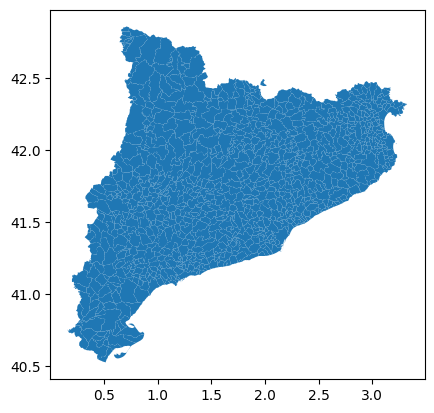

In [40]:
municipios.plot()

/tmp/ipykernel_376945/3299163079.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios.centroid.plot()


<AxesSubplot: >

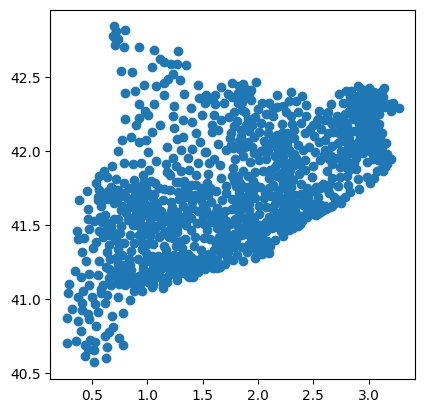

In [43]:
municipios.centroid.plot()

https://datos.gob.es/es/catalogo/a09002970-poblacion-de-cataluna-por-municipio-rango-de-edad-y-sexo

In [44]:
pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/b4rr-d25b/rows.csv?accessType=DOWNLOAD')

,Any,Codi,Literal,Homes. De 0 a 14 anys,Homes. De 15 a 64 anys,Homes. De 65 anys i més,Dones. De 0 a 14 anys,Dones. De 15 a 64 anys,Dones. De 65 anys i més,Total. De 0 a 14 anys,Total. De 15 a 64 anys,Total. De 65 anys i més
0,2019,250019,Abella de la Conca,10,64,22,9,53,21,19,117,43
1,2019,80018,Abrera,1205,4243,878,1105,4054,1004,2310,8297,1882
2,2019,250024,Àger,25,208,87,24,155,89,49,363,176
3,2019,250030,Agramunt,412,1806,471,426,1660,596,838,3466,1067
4,2019,80023,Aguilar de Segarra,27,98,30,27,82,24,54,180,54
...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2020,252555,Vinaixa,30,137,68,14,125,76,44,262,144
1890,2020,431779,Vinebre,40,132,43,24,131,55,64,263,98
1891,2020,431785,Vinyols i els Arcs,186,736,191,185,669,157,371,1405,348
1892,2020,83089,Viver i Serrateix,13,53,22,14,45,25,27,98,47


https://datos.gob.es/es/catalogo/a09002970-elecciones-municipales-2023-resultados-provisionales-de-las-votaciones-por-municipio

In [45]:
pd.read_csv('https://analisi.transparenciacatalunya.cat/api/views/rtgd-t5kp/rows.csv?accessType=DOWNLOAD')

,CODI_ENS,MUNICIPI,ANY_ELECCIO,SIGLES_CANDIDATURA,VOTS,% VOTS,REGIDORS/ES
0,2500190004,Abella de la Conca,2023,ERC-AM,56,0.00,3
1,2500190004,Abella de la Conca,2023,JUNTS PER ABELLA DE LA CONCA- COMPROMÍS MUNICIPAL,52,0.00,2
2,2500190004,Abella de la Conca,2023,COMPROMÍS PEL MUNICIPI - CANDIDATURA DE PROGRÉS,20,0.00,0
3,800180001,Abrera,2023,PSC-CP,2622,50.48,10
4,800180001,Abrera,2023,AEC - C,1090,20.98,4
...,...,...,...,...,...,...,...
3559,4317850006,Vinyols i els Arcs,2023,PSC-CP,54,4.56,0
3560,4317850006,Vinyols i els Arcs,2023,PP,36,3.04,0
3561,830890004,Viver i Serrateix,2023,CM,71,0.00,5
3562,830890004,Viver i Serrateix,2023,CP,14,0.00,0
